In [21]:
# Import Libraries
from sklearn.utils import class_weight
from keras.preprocessing.image import ImageDataGenerator, load_img
import tensorflow as tf
import numpy as np
import tensorflow as tf
from tensorflow import keras
import random
import os
from PIL import Image

In [22]:
TRAINING_DIR = "dataset/train_images/"
TEST_DIR = "dataset/test_images/"
DEFAULT_SIZE = (150, 150)

In [23]:

ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator
#Using ImageDataGenerator to ease Data preparation as it lables images based on Folder Name which is ideal for the way Data Set is arranged

train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

test_datagen = ImageDataGenerator(rescale=1.0/255.)
test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  batch_size=32,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32,(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64,(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()




Found 2408 images belonging to 10 classes.
Found 604 images belonging to 10 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
___________________________________

In [24]:
class_weight = {
        0: (604 / (10 * 160)),
        1: (604 / (10 * 26)),
        2: (604 / (10 * 19)),
        3: (604 / (10 * 25)),
        4: (604 / (10 * 87)),
        5: (604 / (10 * 23)),
        6: (604 / (10 * 40)),
        7: (604 / (10 * 160)),
        8: (604 / (10 * 17)),
        9: (604 / (10 * 47)) 
    }


In [25]:
history = model.fit(train_generator,
                    epochs=10,
                    verbose=1,
                    validation_data=test_generator,class_weight= class_weight)
                              
model.save('CNNmodel.h5')


Epoch 1/10
76/76 [==============================] - 62s 806ms/step - loss: 1.8231 - accuracy: 0.4413 - val_loss: 0.4876 - val_accuracy: 0.8709
Epoch 2/10
76/76 [==============================] - 61s 800ms/step - loss: 0.5817 - accuracy: 0.8801 - val_loss: 0.1837 - val_accuracy: 0.9503
Epoch 3/10
76/76 [==============================] - 61s 800ms/step - loss: 0.2285 - accuracy: 0.9555 - val_loss: 0.3004 - val_accuracy: 0.9139
Epoch 4/10
76/76 [==============================] - 65s 852ms/step - loss: 0.2102 - accuracy: 0.9630 - val_loss: 0.2205 - val_accuracy: 0.9387
Epoch 5/10
76/76 [==============================] - 68s 899ms/step - loss: 0.0674 - accuracy: 0.9876 - val_loss: 0.2911 - val_accuracy: 0.9238
Epoch 6/10
76/76 [==============================] - 70s 920ms/step - loss: 0.0512 - accuracy: 0.9849 - val_loss: 0.2560 - val_accuracy: 0.9404
Epoch 7/10
76/76 [==============================] - 73s 964ms/step - loss: 0.0415 - accuracy: 0.9869 - val_loss: 0.2328 - val_accuracy: 0.9470

<Figure size 432x288 with 0 Axes>

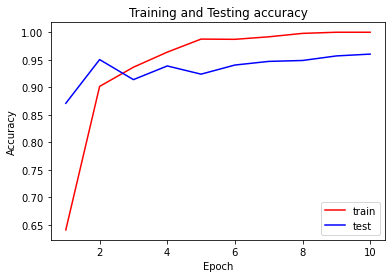

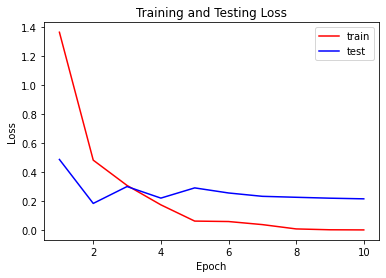

<Figure size 432x288 with 0 Axes>

In [26]:
#Visualisation
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,11) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Testing accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.figure()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.legend(['train', 'test'], loc='upper right')
plt.title('Training and Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.figure()
# Desired output. Charts with training and validation metrics. No crash :)


In [27]:
model.evaluate(test_generator)

19/19 [==============================] - 5s 249ms/step - loss: 0.2154 - accuracy: 0.9603


[0.21542823314666748, 0.9602649211883545]

In [28]:
classes = ["Airplanes","Bonsai","Butterfly","Car_side","Faces","ketch","Leopards","Motorbikes","Scorpion","Watch"]
true_classes = test_generator.classes
print(classes)

['Airplanes', 'Bonsai', 'Butterfly', 'Car_side', 'Faces', 'ketch', 'Leopards', 'Motorbikes', 'Scorpion', 'Watch']


Class 0: 26.359%, Class 1: 4.283%, Class 2: 3.130%, Class 3: 4.119%, Class 4: 14.333%,Class 5: 3.789%, Class 6: 7.084%, Class 7: 26.359%, Class 8: 2.801%,Class 9: 7.743%


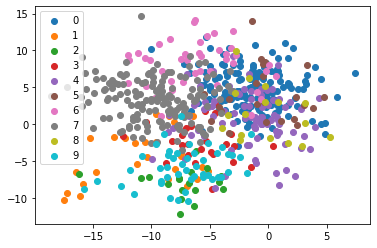

In [29]:
# evaluate a majority class classifier on an 1:100 imbalanced dataset
from numpy import mean
from numpy import hstack
from numpy import vstack
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_blobs
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
 
# create a dataset with a given class distribution
def get_dataset(proportions):
	# determine the number of classes
	n_classes = 10
	# determine the number of examples to generate for each class
	largest = max([v for k,v in proportions.items()])
	n_samples = largest * n_classes
	# create dataset
	X, y = make_blobs(n_samples=n_samples, centers=n_classes, n_features=2, random_state=1, cluster_std=3)
	# collect the examples
	X_list, y_list = list(), list()
	for k,v in proportions.items():
		row_ix = where(y == k)[0]
		selected = row_ix[:v]
		X_list.append(X[selected, :])
		y_list.append(y[selected])
	return vstack(X_list), hstack(y_list)
 
# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y, metric):
	# define model
	model = DummyClassifier(strategy='most_frequent')
	# evaluate a model with repeated stratified k fold cv
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
	return scores
# scatter plot of dataset, different color for each class
def plot_dataset(X, y):
	# create scatter plot for samples from each class
	n_classes = 10
	for class_value in range(n_classes):
		# get row indexes for samples with this class
		row_ix = where(y == class_value)[0]
		# create scatter of these samples
		pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(class_value))
	# show a legend
	pyplot.legend()
	# show the plot
	pyplot.show()
# define the class distribution 1:100
proportions = {0:160, 1:26,2:19, 3:25,4:87, 5:23,6:43, 7:160,8:17, 9:47}
# generate dataset
X, y = get_dataset(proportions)
# summarize class distribution:
major1 = (len(where(y == 0)[0]) / len(X)) * 100
minor1 = (len(where(y == 1)[0]) / len(X)) * 100
major2 = (len(where(y == 2)[0]) / len(X)) * 100
minor2 = (len(where(y == 3)[0]) / len(X)) * 100
major3 = (len(where(y == 4)[0]) / len(X)) * 100
minor3 = (len(where(y == 5)[0]) / len(X)) * 100
major4 = (len(where(y == 6)[0]) / len(X)) * 100
minor4 = (len(where(y == 7)[0]) / len(X)) * 100
major5 = (len(where(y == 8)[0]) / len(X)) * 100
minor5 = (len(where(y == 9)[0]) / len(X)) * 100
print('Class 0: %.3f%%, Class 1: %.3f%%, Class 2: %.3f%%, Class 3: %.3f%%, Class 4: %.3f%%,Class 5: %.3f%%, Class 6: %.3f%%, Class 7: %.3f%%, Class 8: %.3f%%,Class 9: %.3f%%'
      %(major1, minor1,major2, minor2,major3, minor3,major4, minor4,major5, minor5))
plot_dataset(X, y)

In [30]:

test_generator.class_indices

{'airplanes': 0,
 'bonsai': 1,
 'butterfly': 2,
 'car_side': 3,
 'faces': 4,
 'ketch': 5,
 'leopards': 6,
 'motorbikes': 7,
 'scorpion': 8,
 'watch': 9}

In [31]:
from keras.preprocessing import image as image_utils
image = keras.preprocessing.image
path = 'dataset/test_images/faces/image_0389.jpg'
img = image.load_img(path, target_size=(150, 150))
test_image = image_utils.img_to_array(img)
test_image = np.expand_dims(test_image, axis=0)


In [32]:
result = model.predict_on_batch(test_image)
# Get the filenames from the generator
fnames = test_generator.filenames

ground_truth = test_generator.classes
label2index = test_generator.class_indices
idx2label = dict((v,k) for k,v in label2index.items())
print(result.argmax())
for category, value in test_generator.class_indices.items():
            if value == result.argmax():
                print(category)

4
faces


In [34]:
# Create a generator for prediction
tag_size =(150,150)
test_generator = test_datagen.flow_from_directory(
        TEST_DIR,
        target_size=tag_size,
        batch_size=100,
        class_mode='categorical',
        shuffle=False)
# Get the filenames from the generator
fnames = test_generator.filenames

ground_truth = test_generator.classes
label2index = test_generator.class_indices
idx2label = dict((v,k) for k,v in label2index.items())
       
# Get the predictions from the model using the generator
predictions = model.predict(test_generator,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))

# Show the errors
# for i in range(len(errors)):
#     pred_class = np.argmax(predictions[errors[i]])
#     print("Predicted class:",pred_class)
#     pred_label = idx2label[pred_class]
#     print("Predicted label:",pred_label)
#     title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
#         fnames[errors[i]].split('/')[0],
#         pred_label,
#         predictions[errors[i]][pred_class])
    
#     original = load_img('{}/{}'.format(TEST_DIR,fnames[errors[i]]))
#     plt.figure(figsize=[7,7])
#     plt.axis('off')
#     plt.title(title)
#     plt.imshow(original)
#     plt.show()
#     label2index = test_generator.class_indices
# # Getting the mapping from class index to class label
# idx2label = dict((v,k) for k,v in label2index.items())

Found 604 images belonging to 10 classes.
7/7 [==============================] - 5s 623ms/step
No of errors = 24/604


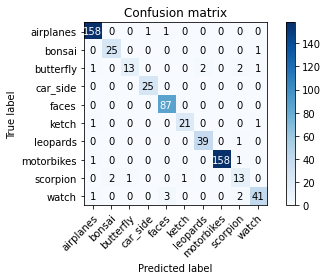

In [35]:
from sklearn.metrics import confusion_matrix
def PlotConfusionMatrix(ground_truth, predicted_classes):
    np.set_printoptions(precision=2)
    classes = ['airplanes','bonsai','butterfly','car_side','faces','ketch','leopards','motorbikes','scorpion','watch']
    title='Confusion matrix'
    cmap=plt.cm.Blues
    cm = confusion_matrix(ground_truth,predicted_classes)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
    fmt ='d' 
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j],fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()    
    plt.show()
PlotConfusionMatrix(ground_truth, predicted_classes)